In [1]:
# jupyter config
%reset -f
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In [3]:
# Import Data
train_data = pd.read_csv('dataset/train.csv')
features_data = pd.read_csv('dataset/features.csv')
stores_data = pd.read_csv('dataset/stores.csv')
test_data = pd.read_csv('dataset/test.csv')

In [4]:
# Merge datasets
X = pd.merge(stores_data, pd.merge(train_data, features_data))
Xtest = pd.merge(stores_data, pd.merge(test_data, features_data))

# Exploratory Dataset Analysis: 
## Check missing values and attributes types

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [6]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Type          115064 non-null  object 
 2   Size          115064 non-null  int64  
 3   Dept          115064 non-null  int64  
 4   Date          115064 non-null  object 
 5   IsHoliday     115064 non-null  bool   
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


- There's missing values in the MarkDowns* columns of the training set.
- There's missing values in the following columns of the test set: MarkDowns*, CPI, Unemployment.

So there's too many missing values in the Markdowns columns.

## Correlation

In [7]:
X.corr()

,Store,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.182881,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Size,-0.182881,1.000000,-0.002966,0.243828,0.000593,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Dept,0.024004,-0.002966,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.243828,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000593,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Temperature,-0.050097,-0.058313,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003361,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,0.345673,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.108827,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.048913,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


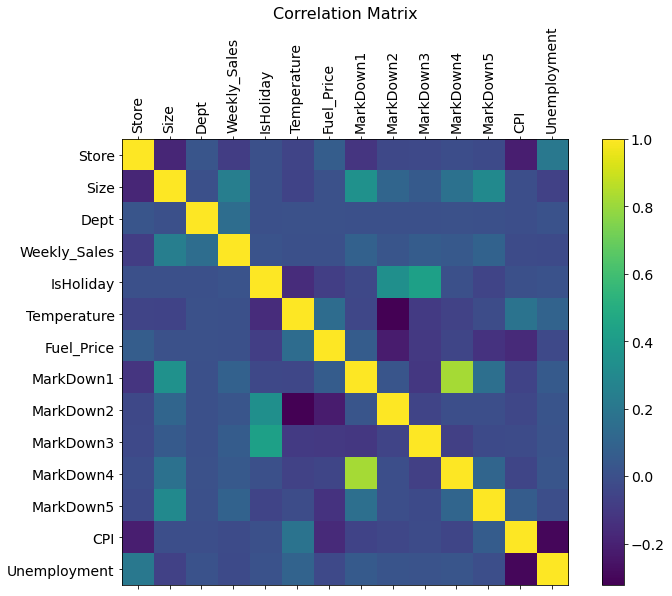

In [8]:
f = plt.figure(figsize=(12, 8))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.select_dtypes(['number', 'bool']).shape[1]), X.select_dtypes(['number', 'bool']).columns, fontsize=14, rotation=90)
plt.yticks(range(X.select_dtypes(['number', 'bool']).shape[1]), X.select_dtypes(['number', 'bool']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

- We can notice that there's a weak correlation between Weekly Sales and 'Size' and Weekly Sales and 'Dept'
- Different correlation exists between the Markdowns, especially with Markdown1

## Histogram
Let's plot the histogram to look at the distribution of numeric variables.

array([[<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>],
       [<AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>],
       [<AxesSubplot:title={'center':'MarkDown5'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>]], dtype=object)

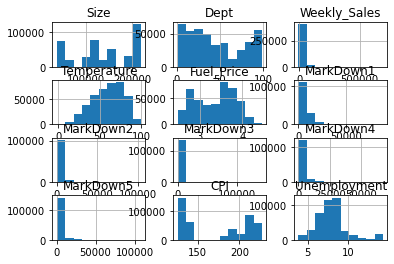

<Figure size 720x432 with 0 Axes>

In [9]:
fig, axis = plt.subplots(4, 3)
fig = plt.figure(figsize=(10, 6))
#create histogram for each column in DataFrame
X.drop("Store", axis=1).select_dtypes(['number']).hist(ax=axis)

## Categorical Variable
The only categorical variable is the 'Type' columns

In [10]:
X.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

# Data Cleaning and Preprocessing

In [11]:
# Drop all markdown columns because of missing values
X = X.drop(columns=["MarkDown1", 'MarkDown2', 'MarkDown3', "MarkDown4", 'MarkDown5'])
Xtest = Xtest.drop(columns=["MarkDown1", 'MarkDown2', 'MarkDown3', "MarkDown4", 'MarkDown5'])

## Handle missing values
After we dropped the MarkDowns, there's still missing values left in the 'Unemployment' and 'CPI' columns on the test set.

In [12]:
Xtest.Unemployment.fillna(Xtest.Unemployment.mean(), inplace=True)
Xtest.CPI.fillna(Xtest.CPI.mean(), inplace=True)

## Encode categorical attributes and boolean attributes

In [13]:
# Categorical
X.loc[X.Type == 'A', 'Type'] = 2
X.loc[X.Type == 'B', 'Type'] = 1
X.loc[X.Type == 'C', 'Type'] = 0
Xtest.loc[Xtest.Type == 'A', 'Type'] = 2
Xtest.loc[Xtest.Type == 'B', 'Type'] = 1
Xtest.loc[Xtest.Type == 'C', 'Type'] = 0

# boolean attributes
X.loc[X["IsHoliday"] == True, 'IsHoliday'] = 1
X.loc[X["IsHoliday"] == False, 'IsHoliday'] = 0
Xtest.loc[X["IsHoliday"] == True, 'IsHoliday'] = 1
Xtest.loc[X["IsHoliday"] == False, 'IsHoliday'] = 0

X.IsHoliday = X.IsHoliday.astype('int32')
X.Type = X.Type.astype('int32')
Xtest.IsHoliday = Xtest.IsHoliday.astype('int32')
Xtest.Type = Xtest.Type.astype('int32')

## Encode 'Date' feature as cyclical feature
When encoding the 'Date' feature, we have two choice :
- either we replace it with 'Week Of The Year
- ... or encode it as a cyclical feature

Let's do both and see the prediction accuracy on both dataset.

In [14]:
def extract_year_and_month(dateString):
    year = dateString[:4]
    month = dateString[5:7]
    return year, month

## Encode for train data
year_values = []
month_values = []

for date in X.Date.values:
    year, month = extract_year_and_month(date)
    year_values.append(year)
    month_values.append(month)
    
X["Year"] = year_values
X["Month"] = month_values

## Encode for test data
year_values = []
month_values = []

for date in Xtest.Date.values:
    year, month = extract_year_and_month(date)
    year_values.append(year)
    month_values.append(month)
    
Xtest["Year"] = year_values
Xtest["Month"] = month_values

In [15]:
## Create month sin and month cos
def sin_transform(values):
    return np.sin(2*np.pi*values/12)

def cos_transform(values):
    return np.cos(2*np.pi*values/12)

X['MonthSin'] = sin_transform(X.Month.values.astype('int32'))
X['MonthCos'] = cos_transform(X.Month.values.astype('int32'))
Xtest['MonthSin'] = sin_transform(Xtest.Month.values.astype('int32'))
Xtest['MonthCos'] = cos_transform(Xtest.Month.values.astype('int32'))

## Drop year because the year is just an integer and it doesn't carry information for the prediction
## Only season change influence the prediction, which is already carried inside the 'Month' feature.
X = X.drop(["Date", "Year", "Month"], axis=1)
Xtest = Xtest.drop(["Date", "Year", "Month"], axis=1)

## Extract validation dataset
We're using the *val_rat* variable to define the validation dataset ratio.

In [16]:
val_rat = 0.01 # validation_ratio
validation_indexes = np.random.choice(len(X), (int(np.floor(len(X)*val_rat)),), replace=False)
Xval = X.loc[validation_indexes]
X = X.drop(validation_indexes, axis=0)

In [17]:
# Get targets
y = pd.DataFrame(X.Weekly_Sales, columns=["Weekly_Sales"])
yval = pd.DataFrame(Xval.Weekly_Sales, columns=["Weekly_Sales"])
X = X.drop(columns='Weekly_Sales')
Xval = Xval.drop(columns='Weekly_Sales')

In [18]:
# Normalize data
def standardize(dataframe):
    for col in dataframe.select_dtypes(include='number').columns:
        if col != 'Store': # Exclude the Store ID
            dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()
    
X_not_standard = X.copy()
Xval_not_standard = Xval.copy()
Xtest_not_standard = Xtest.copy()

standardize(X)
standardize(Xval)
standardize(Xtest)

In [19]:
# Measure of Model Accuracy
def rmse(predicted, target):
    if len(predicted) != len(target):
        return("Error: target and predicted array length are not the same !")
    else:
        n = len(predicted)
        return round(np.sqrt(np.sum(np.power(predicted - target, 2)) / n), 2)
    
    
def mse(predicted, target):
    if len(predicted) != len(target):
        return("Error: target and predicted array length are not the same !")
    else:
        n = len(predicted)
        return round(np.sum(np.power(predicted - target, 2)) / n, 2)
    

def rss(predicted, target):
    # Residual Sum Square
    return np.sum(np.power(predicted - target, 2))

def tss(target):
    # Total Sum Square
    return np.sum(target - np.mean(target))
    
def r2(predicted, target):
    return round(1 - rss(predicted, target)/tss(target), 2)

In [20]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X.values,y.values)
linReg_predicted = linReg.predict(Xval.values)

In [21]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X.values, y.values)
lasso_predicted = lasso.predict(Xval.values)

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=30)
randomForest.fit(X.values, y.values)
randomForest_predict = randomForest.predict(Xval.values)

/tmp/ipykernel_38242/1528662672.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X.values, y.values)


# Compare model and analyzing the result

In [23]:
# Compare model
from sklearn.metrics import r2_score
predictor_names = ['Linear Regression', 'Lasso Regression', 'RandomForest']
perf_metrics = ["RMSE", "R2"]
result_values = [
    {"RMSE": rmse(linReg_predicted, yval.values), "R2": r2_score(yval.values, linReg_predicted)},
    {"RMSE": rmse(lasso_predicted, yval.values), "R2": r2_score(yval.values, lasso_predicted)},
    {"RMSE": rmse(randomForest_predict, yval.values), "R2": r2_score(yval.values, randomForest_predict)},
]
result_table = pd.DataFrame(result_values, index=predictor_names)

In [24]:
result_table

,RMSE,R2
Linear Regression,22047.70,0.084869
Lasso Regression,1558975.12,0.084869
RandomForest,2088780.07,0.936754


Let's see the most important feature by looking at the *feature_importances* propriety of the random forest

In [25]:
randomForest.feature_importances

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_importances'